In [26]:
using Plots, PlotThemes, LaTeXStrings
using OffsetArrays
using LinearAlgebra
using FFTW
using StatsBase
using Unitful
using Base: Fix1, Fix2
using Distributions
using ArbNumerics
using Trapz

pyplot()

theme(:wong2)
default(;palette=:seaborn_deep6,fontfamily="serif")
j=im

ArgumentError: ArgumentError: Package PyPlot not found in current path.
- Run `import Pkg; Pkg.add("PyPlot")` to install the PyPlot package.

In [27]:
function fir(y, idx, N)
    return y[idx] - sum(y[idx-1:idx-N-2])/N
end

fir (generic function with 1 method)

In [28]:
y = OffsetArray(zeros(10000), -1000)
for i in 1:9000
    y[i] = 1
end

In [57]:
function iir(y, N)
    h1 = OffsetArray(zeros(10000), -1000)
    for i in 1:9000
        h1[i] = y[i] - mean(h1[i-N-2:i-1])/N
    end
    return h1
end

iir (generic function with 1 method)

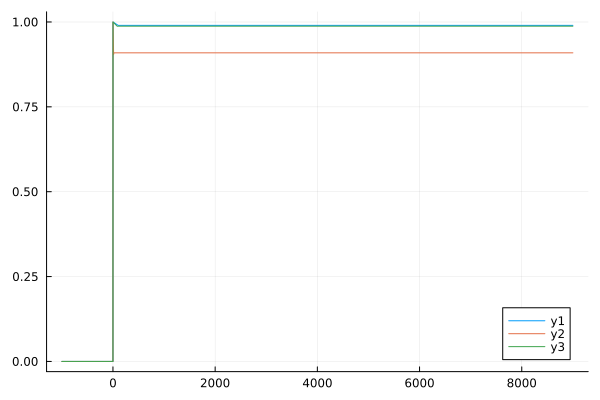

In [58]:
plot(iir(y,100))
plot!(iir(y,10))
plot!(iir(y,80))

In [59]:
function fir(y, N)
    h1 = OffsetArray(zeros(10000), -1000)
    for i in 1:9000
        h1[i] = y[i] - mean(y[i-N-2:i-1])
    end
    return h1
end

fir (generic function with 2 methods)

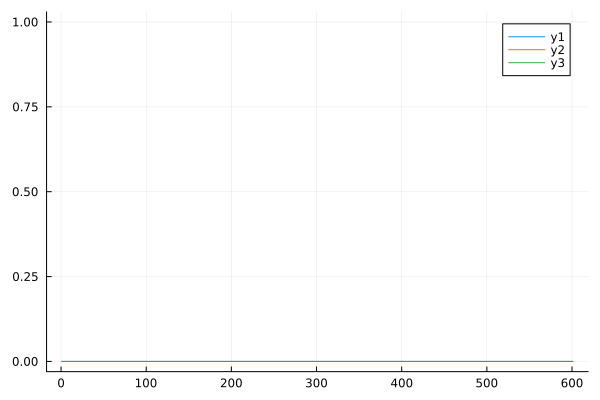

In [61]:
plot(fir(y,100)[300:900])
plot!(fir(y,10)[300:900])
plot!(fir(y,80)[300:900])